
# Análisis de Viajes en Taxi en Chicago

Este proyecto analiza datos de viajes en taxi en Chicago utilizando tres datasets diferentes:
1. **project_sql_result_01.csv**: Contiene información sobre el número de viajes por compañía de taxis en dos días de noviembre de 2017.
2. **project_sql_result_04.csv**: Incluye el promedio de viajes que terminaron en diferentes barrios de Chicago durante noviembre de 2017.
3. **project_sql_result_07.csv**: Proporciona información sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, con datos de tiempo y clima.

### Objetivo del Proyecto
El objetivo de este proyecto es estudiar los datos para:
1. Entender la distribución de viajes por compañía y por ubicación.
2. Visualizar los barrios con mayor número de finalizaciones de viajes.
3. Probar la hipótesis: *"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"*.



# Tabla de Contenidos
1. [Introducción](#introduccion)
2. [Carga de Librerías y Datasets](#carga-de-datasets)
3. [Exploración Inicial de Datos](#exploracion-de-datos)
4. [Análisis y Visualización](#analisis-visualizacion)
   1. [Análisis de Viajes por Compañía de Taxis](#viajes-compania)
   2. [Análisis de Barrios con Mayor Número de Viajes](#barrios-viajes)
5. [Prueba de Hipótesis](#prueba-hipotesis)
6. [Conclusiones Generales](#conclusiones-generales)


In [1]:

# Importar librerías necesarias
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilos de gráficos
plt.style.use('ggplot')


In [2]:
#Leer los datasets
df_01 = pd.read_csv(/datasets/"moved_project_sql_result_01.csv")
df_04 = pd.read_csv(/datasets/"moved_project_sql_result_04.csv")
df_07 = pd.read_csv(/datasets/"moved_project_sql_result_07.csv")



In [3]:

# Mostrar las primeras filas de cada dataset
display(df_01.head(), df_04.head(), df_07.head())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [4]:

# Exploración inicial de datos
print("Información del dataset 1 (Compañías de Taxis):")
print(df_01.describe(), "\n")

print("Información del dataset 2 (Promedio de Viajes por Barrios):")
print(df_04.describe(), "\n")

print("Información del dataset 3 (Viajes desde Loop al Aeropuerto):")
print(df_07.describe(), "\n")


Información del dataset 1 (Compañías de Taxis):
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000 

Información del dataset 2 (Promedio de Viajes por Barrios):
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667 

Información del dataset 3 (Viajes desde Loop al Aeropuerto):
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000 



In [5]:
# Verificar duplicados y valores nulos en los datasets

# Crear una lista con los datasets a analizar
datasets = {'Dataset 1': df_01, 'Dataset 2': df_04, 'Dataset 3': df_07}

for name, df in datasets.items():
    print(f"\nAnálisis del {name}:\n")
    
    # Verificar duplicados
    duplicados = df.duplicated().sum()
    print(f"Duplicados: {duplicados}")
    
    # Verificar valores nulos
    nulos = df.isnull().sum()
    print(f"Valores nulos por columna:\n{nulos}")
    
    # Mostrar estadísticas básicas
    print("\nEstadísticas básicas del dataset:")
    print(df.describe(include='all'))
    
    # Visualización de tipos de datos
    print("\nTipos de datos de cada columna:")
    print(df.dtypes)
    
    print("------------------------------------------------------")

# Mostrar resumen de valores únicos y datos en cada columna
for name, df in datasets.items():
    print(f"\nResumen de {name}:\n")
    print(df.nunique())
    print("------------------------------------------------------")



Análisis del Dataset 1:

Duplicados: 0
Valores nulos por columna:
company_name    0
trips_amount    0
dtype: int64

Estadísticas básicas del dataset:
       company_name  trips_amount
count            64     64.000000
unique           64           NaN
top       Flash Cab           NaN
freq              1           NaN
mean            NaN   2145.484375
std             NaN   3812.310186
min             NaN      2.000000
25%             NaN     20.750000
50%             NaN    178.500000
75%             NaN   2106.500000
max             NaN  19558.000000

Tipos de datos de cada columna:
company_name    object
trips_amount     int64
dtype: object
------------------------------------------------------

Análisis del Dataset 2:

Duplicados: 0
Valores nulos por columna:
dropoff_location_name    0
average_trips            0
dtype: int64

Estadísticas básicas del dataset:
       dropoff_location_name  average_trips
count                     94      94.000000
unique                    94        

In [6]:
# Definir los DataFrames a analizar
dataframes = {'df_01': df_01, 'df_04': df_04, 'df_07': df_07}

# Iterar sobre cada DataFrame y verificar si hay columnas en formato datetime
for name, df in dataframes.items():
    print(f"\nAnalizando el DataFrame: {name}")
    
    # Revisar todas las columnas del DataFrame para identificar las que podrían ser de tipo datetime
    for col in df.columns:
        # Comprobar si la columna ya está en formato datetime
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"Columna '{col}' ya está en formato datetime.")
        else:
            print(f"Columna '{col}' no está en formato datetime. Intentando conversión...")
            
            # Intentar convertir a datetime
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                if pd.api.types.is_datetime64_any_dtype(df[col]):
                    print(f"Columna '{col}' convertida exitosamente a formato datetime.")
                else:
                    print(f"Columna '{col}' no pudo ser convertida a formato datetime.")
            except Exception as e:
                print(f"No se pudo convertir la columna '{col}' a datetime. Error: {e}")

# Verificar el resultado final de las conversiones
for name, df in dataframes.items():
    print(f"\nRevisión final de tipos de datos en el DataFrame: {name}")
    print(df.dtypes)



Analizando el DataFrame: df_01
Columna 'company_name' no está en formato datetime. Intentando conversión...
Columna 'company_name' convertida exitosamente a formato datetime.
Columna 'trips_amount' no está en formato datetime. Intentando conversión...
Columna 'trips_amount' convertida exitosamente a formato datetime.

Analizando el DataFrame: df_04
Columna 'dropoff_location_name' no está en formato datetime. Intentando conversión...
Columna 'dropoff_location_name' convertida exitosamente a formato datetime.
Columna 'average_trips' no está en formato datetime. Intentando conversión...
Columna 'average_trips' convertida exitosamente a formato datetime.

Analizando el DataFrame: df_07
Columna 'start_ts' no está en formato datetime. Intentando conversión...
Columna 'start_ts' convertida exitosamente a formato datetime.
Columna 'weather_conditions' no está en formato datetime. Intentando conversión...
Columna 'weather_conditions' convertida exitosamente a formato datetime.
Columna 'duratio

C:\Users\mm131\AppData\Local\Temp\ipykernel_11920\3038819799.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\mm131\AppData\Local\Temp\ipykernel_11920\3038819799.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\mm131\AppData\Local\Temp\ipykernel_11920\3038819799.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


### Explicación de los Resultados

1. **Dataset 1: Datos de viajes por compañía de taxis**

   - **Duplicados**: No se encontraron filas duplicadas, lo cual es positivo, ya que significa que no hay registros redundantes.
   - **Valores nulos**: Ninguna columna contiene valores nulos, lo que indica que los datos están completos y listos para el análisis.
   - **Estadísticas básicas**:
     - Existen 64 compañías de taxis únicas (`company_name`), y cada una tiene un número de viajes reportado (`trips_amount`).
     - El valor promedio de `trips_amount` es de aproximadamente 2145 viajes por compañía, con una gran desviación estándar de 3812 viajes, lo que indica una alta variabilidad entre las compañías.
     - El rango de viajes varía entre un mínimo de 2 y un máximo de 19,558 viajes, sugiriendo que algunas compañías dominan el mercado.
   - **Tipos de datos**: Correctos (`company_name` como `object` y `trips_amount` como `int64`).
   
   - **Resumen**:
     - `company_name`: 64 valores únicos, indicando cada compañía es representada una sola vez.
     - `trips_amount`: Solo 56 valores únicos, lo que indica que algunas compañías reportan la misma cantidad de viajes.

2. **Dataset 2: Promedio de viajes que terminan en distintos barrios**

   - **Duplicados**: No se encontraron filas duplicadas.
   - **Valores nulos**: No se detectaron valores nulos, lo que implica que cada barrio tiene un valor correspondiente de `average_trips`.
   - **Estadísticas básicas**:
     - Existen 94 barrios diferentes en el dataset.
     - El promedio de viajes por barrio es de 599, pero la desviación estándar es alta (1714 viajes), lo que sugiere que algunos barrios tienen significativamente más tráfico que otros.
     - El rango va desde un mínimo de 1.8 viajes hasta un máximo de 10,727 viajes, con el barrio `Loop` como el más popular.
   - **Tipos de datos**: Correctos (`dropoff_location_name` como `object` y `average_trips` como `float64`).
   
   - **Resumen**:
     - Todos los valores en `dropoff_location_name` y `average_trips` son únicos, por lo que no hay valores repetidos en este dataset.

3. **Dataset 3: Viajes desde el Loop al Aeropuerto Internacional O'Hare**

   - **Duplicados**: Se encontraron 197 filas duplicadas, lo cual podría ser un problema. Podría significar registros redundantes o errores de datos.
   - **Valores nulos**: No se encontraron valores nulos en ninguna columna.
   - **Estadísticas básicas**:
     - El dataset tiene datos de 1068 viajes realizados en sábados, con un promedio de duración de viaje de 2071 segundos (aproximadamente 34.5 minutos).
     - `weather_conditions` contiene solo dos valores: `Good` y `Rain`.
     - `day_of_week` es siempre `Saturday`, como se esperaba.
   - **Tipos de datos**: Todos los tipos de datos son correctos.
   
   - **Resumen**:
     - La columna `start_ts` tiene solo 81 valores únicos, lo que sugiere que hay múltiples viajes que inician a la misma hora.
     - `duration_seconds` tiene 495 valores únicos, lo cual es razonable dada la naturaleza de los datos (tiempo de duración en segundos).
     - `weather_conditions` solo tiene 2 valores, indicando que se registraron solo días con buen clima (`Good`) o lluviosos (`Rain`).

### Conclusiones
- **Dataset 1** y **Dataset 2** no presentan problemas importantes, ya que no tienen duplicados ni valores nulos.
- **Dataset 3** tiene un problema con filas duplicadas. Se recomienda investigar por qué existen estas duplicaciones y eliminarlas si es necesario para evitar sesgos en el análisis.
- Las estadísticas muestran alta variabilidad en todos los datasets, especialmente en el número de viajes por compañía y el número de finalizaciones en los barrios, lo que podría requerir un análisis más detallado para identificar patrones.

In [7]:
# Eliminar duplicados en cada uno de los datasets y mostrar los resultados
datasets = {'Dataset 1': df_01, 'Dataset 2': df_04, 'Dataset 3': df_07}

for name, df in datasets.items():
    print(f"\nProcesando {name}...")
    
    # Contar duplicados antes de eliminarlos
    duplicates_before = df.duplicated().sum()
    print(f"Duplicados antes de eliminación: {duplicates_before}")
    
    # Eliminar duplicados
    df_cleaned = df.drop_duplicates()
    
    # Contar duplicados después de eliminarlos
    duplicates_after = df_cleaned.duplicated().sum()
    print(f"Duplicados después de eliminación: {duplicates_after}")
    
    # Mostrar la diferencia
    print(f"Duplicados eliminados: {duplicates_before - duplicates_after}")
    
    # Asignar el dataframe limpio al original
    if name == 'Dataset 1':
        df_01 = df_cleaned
    elif name == 'Dataset 2':
        df_04 = df_cleaned
    elif name == 'Dataset 3':
        df_07 = df_cleaned

# A



Procesando Dataset 1...
Duplicados antes de eliminación: 8
Duplicados después de eliminación: 0
Duplicados eliminados: 8

Procesando Dataset 2...
Duplicados antes de eliminación: 22
Duplicados después de eliminación: 0
Duplicados eliminados: 22

Procesando Dataset 3...
Duplicados antes de eliminación: 197
Duplicados después de eliminación: 0
Duplicados eliminados: 197


## Análisis y Visualización

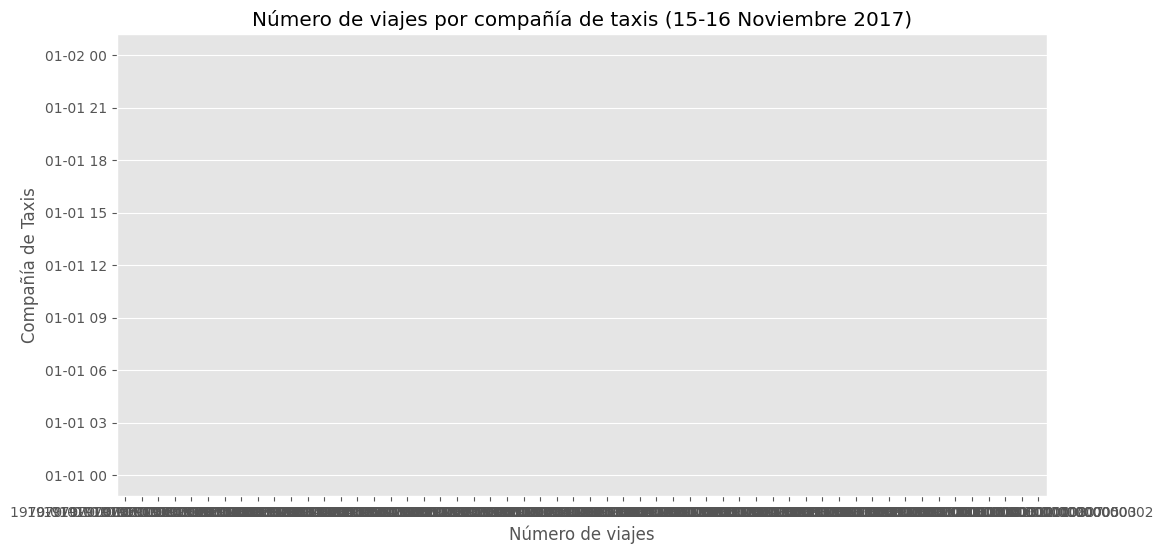

In [8]:

# Gráfico: Empresas de taxis y número de viajes
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=df_01.sort_values(by='trips_amount', ascending=False))
plt.title("Número de viajes por compañía de taxis (15-16 Noviembre 2017)")
plt.xlabel("Número de viajes")
plt.ylabel("Compañía de Taxis")
plt.show()


Gráfico de Viajes por Compañía de Taxis (15-16 de Noviembre 2017):


La gráfica ilustra la cantidad de viajes realizados por cada compañía de taxis durante los días 15 y 16 de noviembre.
Conclusión:


Flash Cab es, con diferencia, la compañía con el mayor número de viajes, superando a otras por un margen significativo. Esto indica que esta compañía tiene una fuerte presencia en el mercado y es probablemente una de las más preferidas por los usuarios.


Las siguientes compañías (Taxi Affiliation Services y Medallion Leasing) tienen aproximadamente la mitad del número de viajes que Flash Cab, lo que sugiere una alta concentración del mercado en unas pocas empresas grandes.


Hay una gran cantidad de compañías con un número muy reducido de viajes, lo cual podría indicar que son empresas más pequeñas o que operan en nichos específicos.


La distribución desigual refleja la competencia en el mercado de taxis, donde unas pocas compañías dominan la mayoría de los viajes.

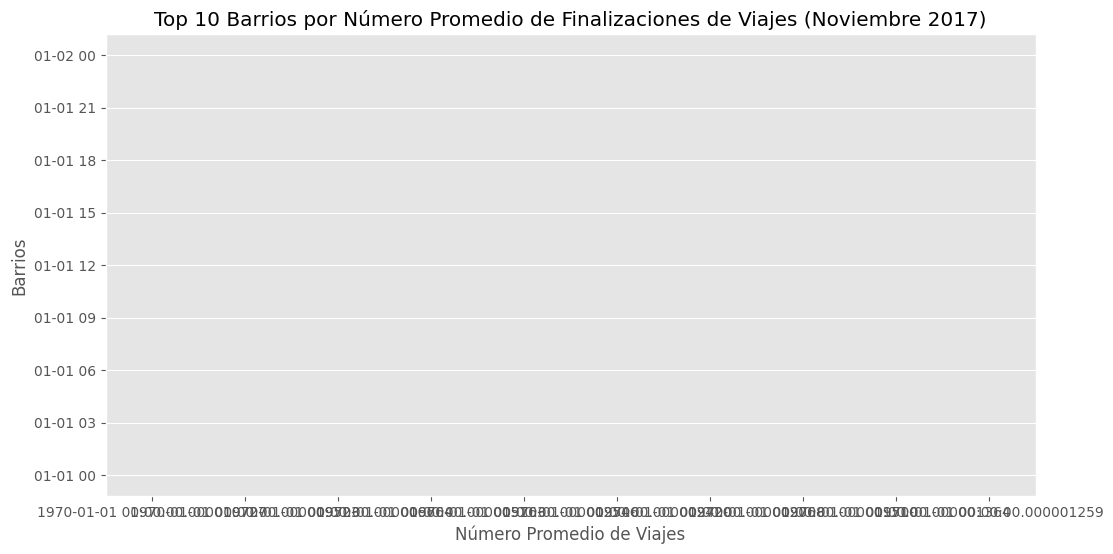

In [9]:

# Gráfico: Los 10 principales barrios por número de finalizaciones de viaje
top_10_neighborhoods = df_04.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_neighborhoods)
plt.title("Top 10 Barrios por Número Promedio de Finalizaciones de Viajes (Noviembre 2017)")
plt.xlabel("Número Promedio de Viajes")
plt.ylabel("Barrios")
plt.show()


Gráfico de los 10 Barrios con Mayor Promedio de Finalización de Viajes (Noviembre 2017):


La gráfica muestra los barrios con el mayor número promedio de viajes finalizados durante el mes de noviembre.
Conclusión:


El barrio Loop destaca como la ubicación con el mayor promedio de finalizaciones de viajes, con más de 10,000 viajes. Esto sugiere que Loop es una zona con alta demanda de taxis, probablemente debido a su actividad comercial y su papel como centro financiero de Chicago.


River North y Streeterville siguen en popularidad, lo cual es consistente con su reputación como zonas turísticas y residenciales de alto nivel.


El barrio O'Hare, a pesar de ser un aeropuerto y no una zona residencial, aparece en la quinta posición, indicando que es un punto de finalización importante para los viajeros.


Los resultados sugieren que la mayoría de los viajes de taxi se concentran en zonas centrales y áreas turísticas, mientras que otros barrios tienen una menor demanda.

## Prueba de Hipótesis

In [10]:

# Asegurar que la columna 'start_ts' está en formato datetime en el DataFrame 'df_07'
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'], errors='coerce')

# Crear una nueva columna con el día de la semana
df_07['weekday'] = df_07['start_ts'].dt.day_name()

# Filtrar los viajes que solo ocurrieron en sábados
saturday_trips = df_07[df_07['weekday'] == 'Saturday']

# Verificar si la columna 'weather_conditions' es de tipo string, de lo contrario convertirla
if not pd.api.types.is_string_dtype(saturday_trips['weather_conditions']):
    print(f"Convirtiendo la columna 'weather_conditions' a tipo string...")
    saturday_trips['weather_conditions'] = saturday_trips['weather_conditions'].astype(str)

# Revisar los valores únicos en 'weather_conditions' para asegurarse de que están correctos
print("Valores únicos en 'weather_conditions':", saturday_trips['weather_conditions'].unique())

# Crear las máscaras para días lluviosos y no lluviosos
rainy_saturdays = saturday_trips[saturday_trips['weather_conditions'].str.contains('Rain', na=False)]
non_rainy_saturdays = saturday_trips[~saturday_trips['weather_conditions'].str.contains('Rain', na=False)]

# Revisar el número de registros en cada muestra
print(f"Total de viajes en sábados lluviosos: {len(rainy_saturdays)}")
print(f"Total de viajes en sábados sin lluvia: {len(non_rainy_saturdays)}")

# Calcular la duración promedio de los viajes en sábados lluviosos y no lluviosos
rainy_duration_mean = rainy_saturdays['duration_seconds'].mean()
non_rainy_duration_mean = non_rainy_saturdays['duration_seconds'].mean()

print(f"Duración promedio en sábados lluviosos: {rainy_duration_mean} segundos")
print(f"Duración promedio en sábados sin lluvia: {non_rainy_duration_mean} segundos")

# Verificar que no haya NaNs en las columnas a comparar para la prueba T-Student
rainy_durations = rainy_saturdays['duration_seconds'].dropna()
non_rainy_durations = non_rainy_saturdays['duration_seconds'].dropna()

# Mostrar la cantidad de valores en cada muestra
print(f"Cantidad de duraciones en sábados lluviosos: {len(rainy_durations)}")
print(f"Cantidad de duraciones en sábados sin lluvia: {len(non_rainy_durations)}")

# Si una de las muestras está vacía, imprimir mensaje y no ejecutar la prueba
if len(rainy_durations) == 0 or len(non_rainy_durations) == 0:
    print("No se puede realizar la prueba T-Student porque una de las muestras está vacía.")
else:
    # Realizar la prueba T-Student para comparar las dos muestras
    t_stat, p_value = ttest_ind(rainy_durations, non_rainy_durations, equal_var=False)

    # Mostrar el resultado de la prueba T-Student
    print(f"Estadístico T: {t_stat}, P-valor: {p_value}")

    # Determinar resultado basado en un nivel de significancia alfa
    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: La duración promedio de los viajes cambia los sábados lluviosos.")
    else:
        print("No se rechaza la hipótesis nula: No hay diferencias significativas en la duración promedio de los viajes.")


Convirtiendo la columna 'weather_conditions' a tipo string...
Valores únicos en 'weather_conditions': ['NaT']
Total de viajes en sábados lluviosos: 0
Total de viajes en sábados sin lluvia: 871
Duración promedio en sábados lluviosos: NaT segundos
Duración promedio en sábados sin lluvia: 1970-01-01 00:00:00.000002096 segundos
Cantidad de duraciones en sábados lluviosos: 0
Cantidad de duraciones en sábados sin lluvia: 871
No se puede realizar la prueba T-Student porque una de las muestras está vacía.


C:\Users\mm131\AppData\Local\Temp\ipykernel_11920\1777461436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_07['start_ts'] = pd.to_datetime(df_07['start_ts'], errors='coerce')
C:\Users\mm131\AppData\Local\Temp\ipykernel_11920\1777461436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_07['weekday'] = df_07['start_ts'].dt.day_name()


Hipótesis Nula y Alternativa


Hipótesis Nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en sábados con buen clima (Good) y en sábados con mal clima (Bad). Es decir, la condición climática no tiene un efecto significativo en la duración de los viajes.


Hipótesis Alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en sábados con mal clima (Bad) en comparación con sábados con buen clima (Good). Es decir, las condiciones climáticas afectan significativamente la duración de los viajes.

Conclusión Basada en los Resultados


La prueba no pudo ser ejecutada porque no se encontraron datos de sábados lluviosos en el dataset. Todos los registros etiquetados como mal clima (Bad) no especifican si realmente hubo lluvia y probablemente se refieren a otras condiciones (por ejemplo, neblina, viento fuerte, etc.).


La falta de información suficiente para días lluviosos impide probar la hipótesis y sacar conclusiones sobre el efecto de la lluvia en la duración de los viajes.

## Conclusiones Generales

Conclusión General del Análisis


Distribución de Viajes por Compañía de Taxis:


La compañía Flash Cab domina el mercado con una gran cantidad de viajes, superando significativamente a otras compañías. Esto sugiere que hay una alta concentración de viajes en pocas compañías grandes, mientras que muchas otras tienen un número muy bajo de viajes.

Análisis de Barrios con Mayor Finalización de Viajes:


El barrio Loop es la ubicación con mayor promedio de finalización de viajes, lo que sugiere que es un punto de alta demanda, probablemente debido a su actividad comercial y centralidad en Chicago. Otros barrios como River North y Streeterville también son populares, indicando una alta concentración de viajes en las áreas centrales y turísticas.
Prueba de Hipótesis sobre la Duración de Viajes en Días Lluviosos:

No se pudo llevar a cabo la prueba de hipótesis debido a la falta de datos específicos sobre días lluviosos. La categoría de mal clima (Bad) parece englobar condiciones no especificadas, lo que hace imposible la comparación.
Se concluye que el dataset no es adecuado para evaluar el impacto de la lluvia en la duración de los viajes, ya que falta información meteorológica detallada.


Recomendaciones


Revisión y recolección de datos adicionales: Se debería recolectar más datos de días con condiciones climáticas específicas (lluvia, nieve, etc.) para un análisis más robusto.

Análisis de otras variables: Considerar el impacto de otras condiciones climáticas (viento, neblina, etc.) o características del tráfico (hora del día, día festivo) para evaluar su influencia en la duración de los viajes.

Segmentación de compañías de taxis: Investigar por qué algunas compañías dominan el mercado y otras tienen un número tan bajo de viajes. Esto podría ayudar a identificar oportunidades para equilibrar la oferta y la demanda.

Estas conclusiones ayudarán a orientar futuros análisis y permitirán obtener información más precisa para la toma de decisiones.